In [21]:
#tfidf
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import re
sentiment_file = pd.read_csv("../data/final/emotion_annotated_articles.tsv", sep="\t")
annotation_file = pd.read_csv("../data/final/merged_annotated_articles.tsv", sep="\t")


In [28]:
with open("../data/final/tf_idf_output.txt", "r") as f:
    tfidf_output = f.readlines()


tf_idf_data = []
current_category = None
for line in tfidf_output:
    if line.startswith("Category:"):
        current_category = line.replace("Category:", "").strip()
    elif re.search(r"\(TF-IDF Score: [\d\.]+\)", line):
        match = re.match(r"(.+?) \(TF-IDF Score: ([\d\.]+)\)", line.strip())
        if match and current_category:
            word, score = match.groups()
            tf_idf_data.append({"Category": current_category, "Word": word, "TF-IDF Score": float(score)})

tf_idf_df = pd.DataFrame(tf_idf_data)

       

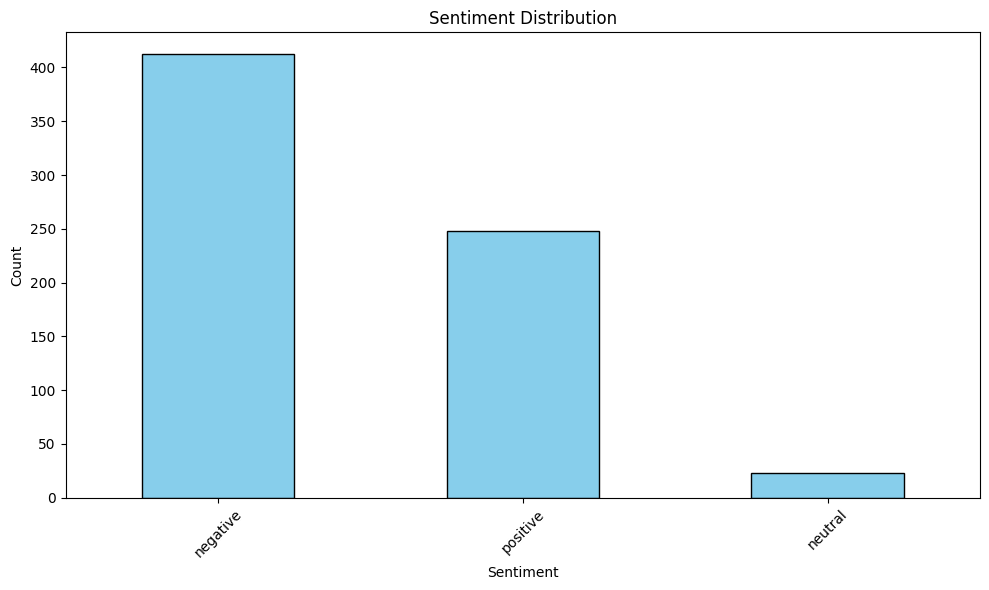

In [23]:
#sentiment distribution
plt.figure(figsize=(10, 6))
sentiment_file["Sentiment"].value_counts().plot(kind="bar", color="skyblue", edgecolor="black") 
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("../visuals/sentiment_distribution.png")
plt.show()



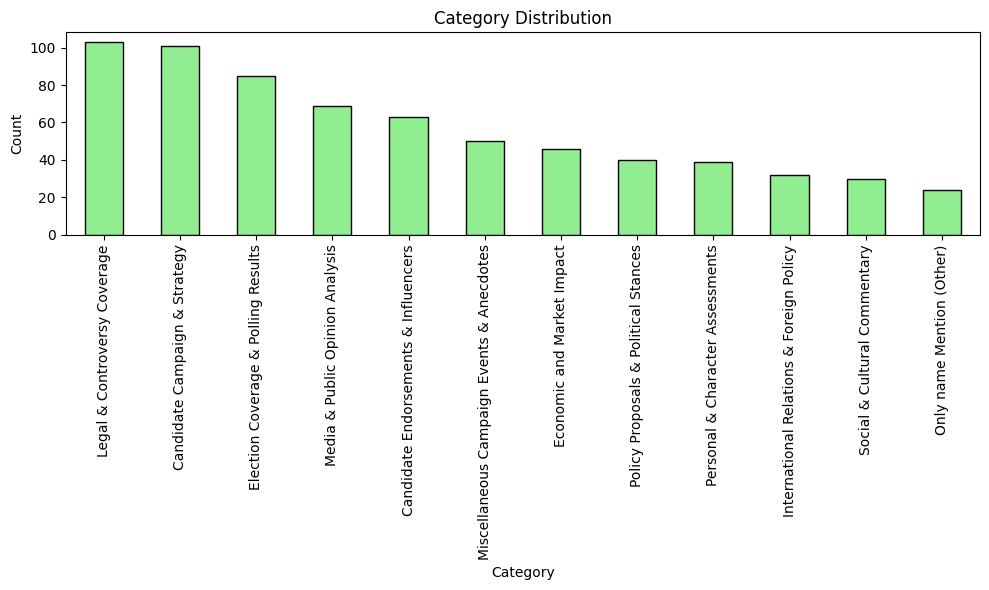

In [24]:
plt.figure(figsize=(10, 6))
annotation_file = annotation_file[annotation_file["Coding"] != "Candidate "]
annotation_file["Coding"].value_counts().plot(kind="bar", color="lightgreen", edgecolor="black")



plt.title("Category Distribution")
plt.xlabel("Category")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig("../visuals/category_distribution.png")
plt.show()


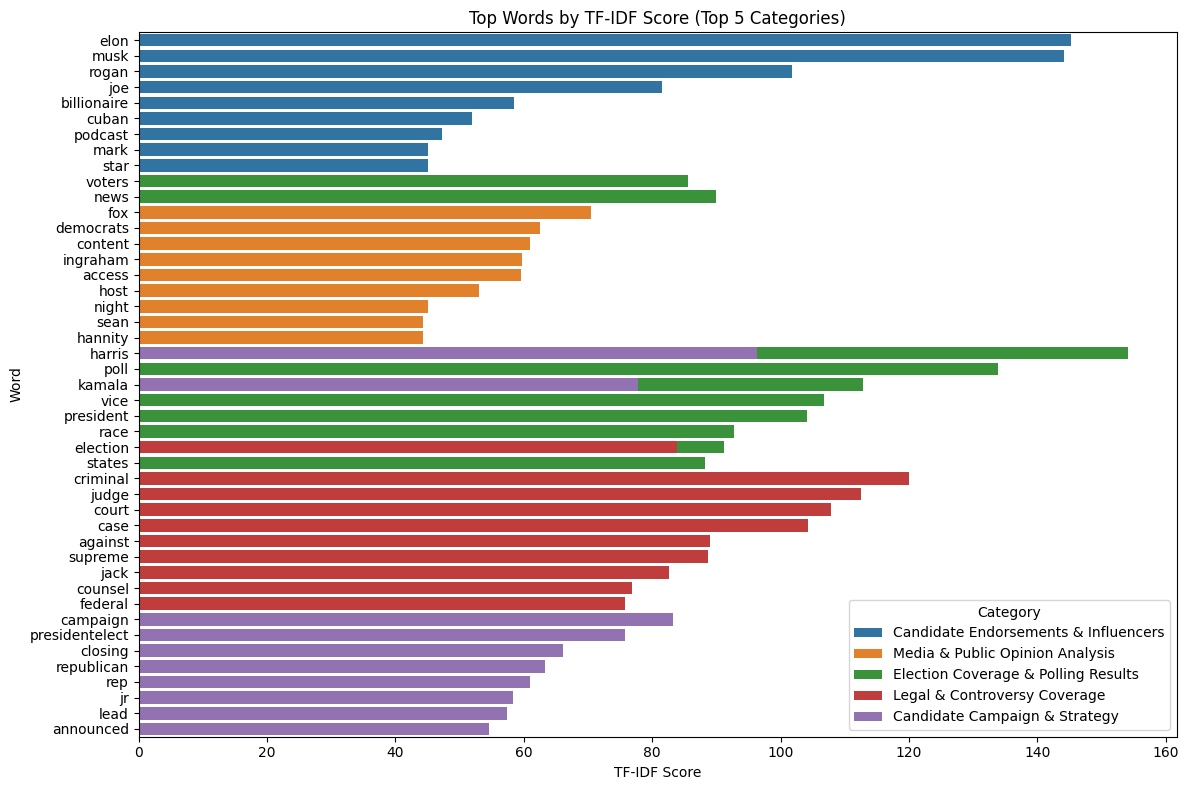

In [34]:


#top_categories = tf_idf_df['Category'].unique()[:5]
#instead of that, we get the 5 most common categories
top_categories = annotation_file["Coding"].value_counts().index[:5]
tf_idf_top_words = tf_idf_df[tf_idf_df['Category'].isin(top_categories)]

plt.figure(figsize=(12, 8))
sns.barplot(
    data=tf_idf_top_words,
    x='TF-IDF Score',
    y='Word',
    hue='Category',
    dodge=False
)
plt.title("Top Words by TF-IDF Score (Top 5 Categories)")
plt.xlabel("TF-IDF Score")
plt.ylabel("Word")
plt.legend(title="Category")
plt.tight_layout()
plt.savefig("../visuals/top_words_by_tfidf.png")
plt.show()


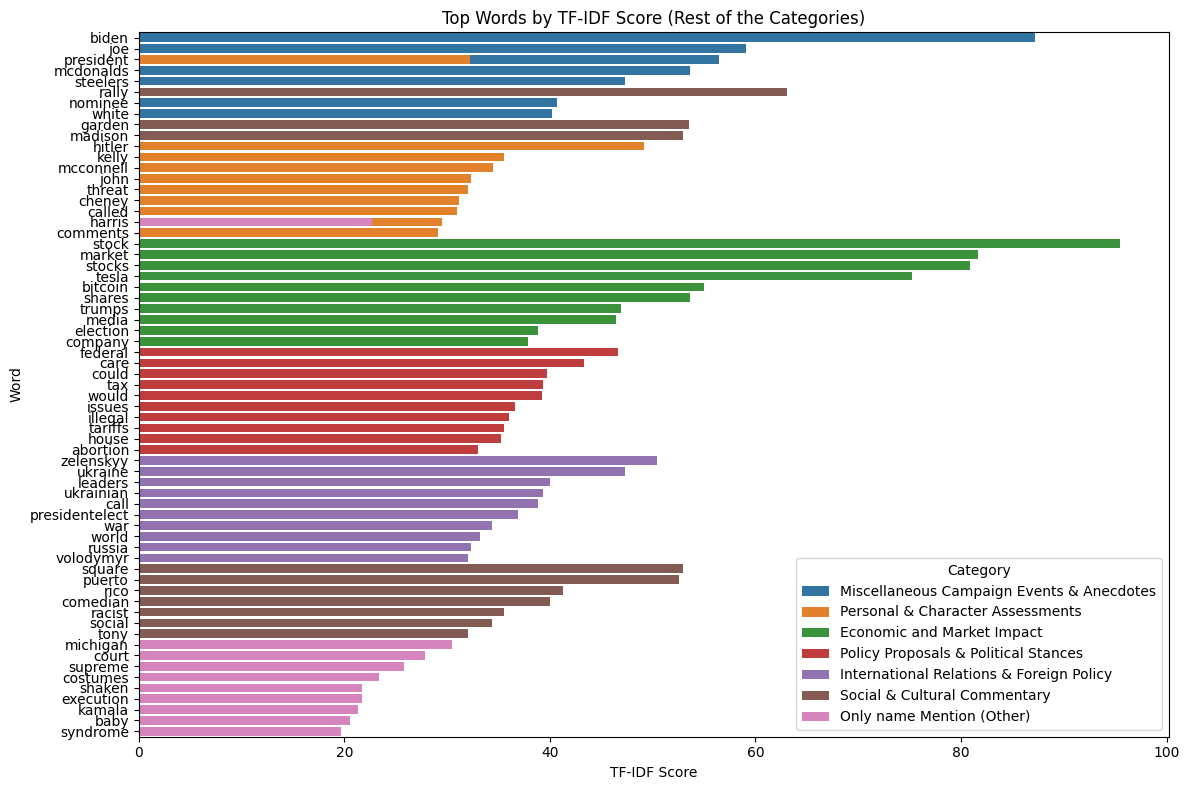

In [35]:
#rest of the categories
rest_categories = annotation_file["Coding"].value_counts().index[5:]

tf_idf_rest_words = tf_idf_df[tf_idf_df['Category'].isin(rest_categories)]

plt.figure(figsize=(12, 8))
sns.barplot(
    data=tf_idf_rest_words,
    x='TF-IDF Score',
    y='Word',
    hue='Category',
    dodge=False
)
plt.title("Top Words by TF-IDF Score (Rest of the Categories)")
plt.xlabel("TF-IDF Score")
plt.ylabel("Word")
plt.legend(title="Category")
plt.tight_layout()
plt.savefig("../visuals/tf_idf_score.png")
plt.show()


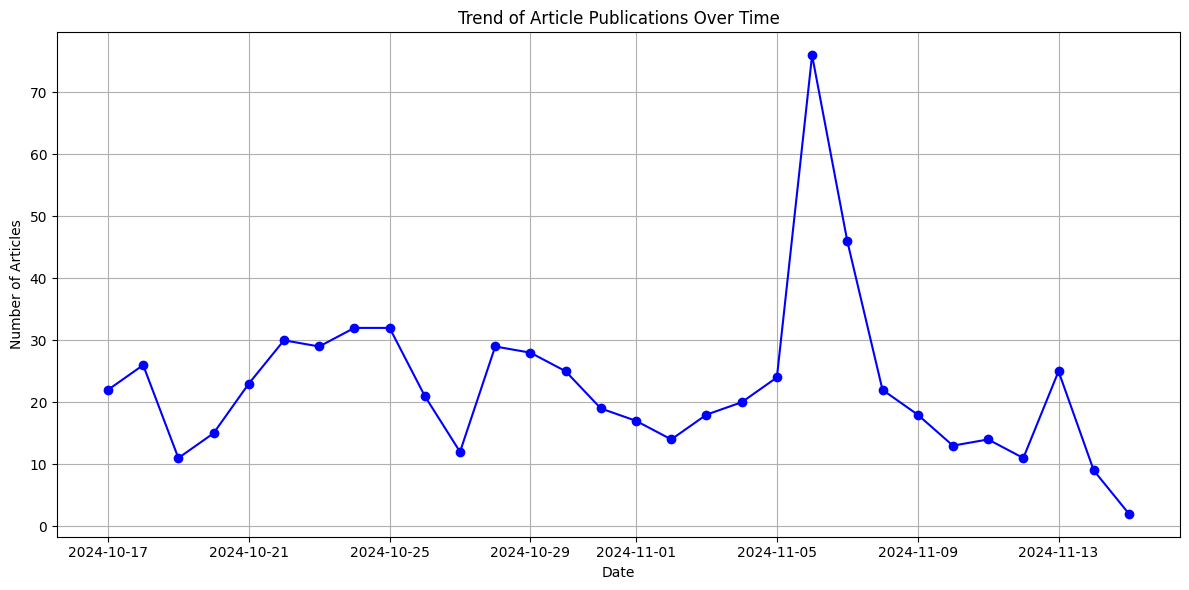

In [33]:
#Time based analysis
sentiment_file["Published At"] = pd.to_datetime(sentiment_file["Published At"])
time_trend = sentiment_file.groupby(sentiment_file["Published At"].dt.date)["Sentiment"].count()

plt.figure(figsize=(12, 6))
time_trend.plot(kind='line', marker='o', color='blue')
plt.title("Trend of Article Publications Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Articles")
plt.grid(True)
plt.tight_layout()
plt.savefig("../visuals/time_trend.png")
plt.show()

<Figure size 1200x600 with 0 Axes>

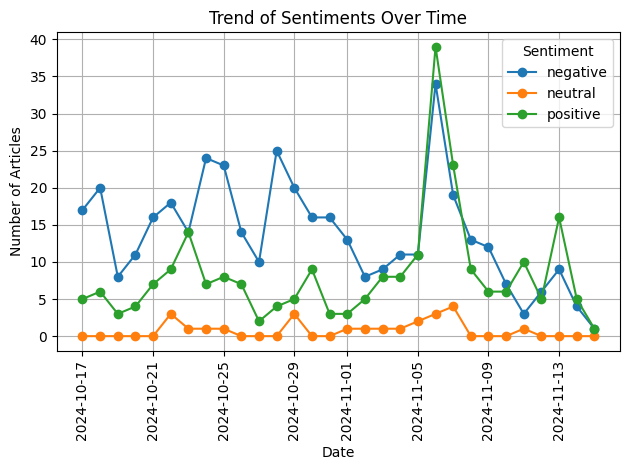

In [37]:
#sentiment over time

sentiment_file["Published At"] = pd.to_datetime(sentiment_file["Published At"])
time_trend = sentiment_file.groupby([sentiment_file["Published At"].dt.date, "Sentiment"])["Sentiment"].count().unstack().fillna(0)

plt.figure(figsize=(12, 6))
time_trend.plot(kind='line', marker='o')
plt.title("Trend of Sentiments Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Articles")
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()
plt.savefig("../visuals/sentiment_over_time.png")
plt.show()

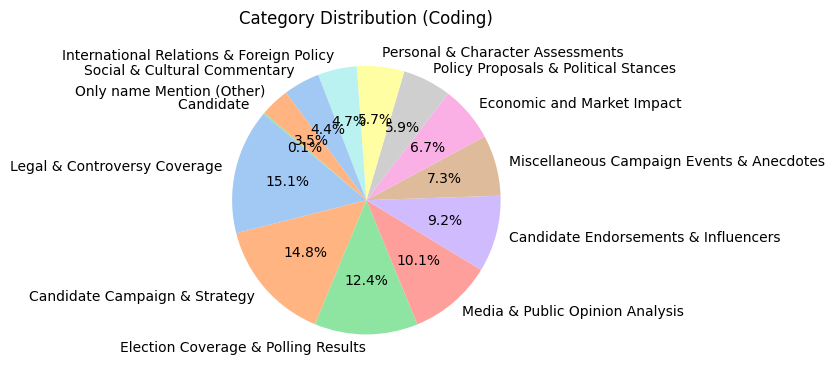

In [ ]:
category_counts = sentiment_file['Coding'].value_counts()

plt.figure(figsize=(8, 8))
category_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title("Category Distribution (Coding)")
plt.ylabel("")  
plt.tight_layout()
plt.savefig("../visuals/category_distribution_pie.png")
plt.show()

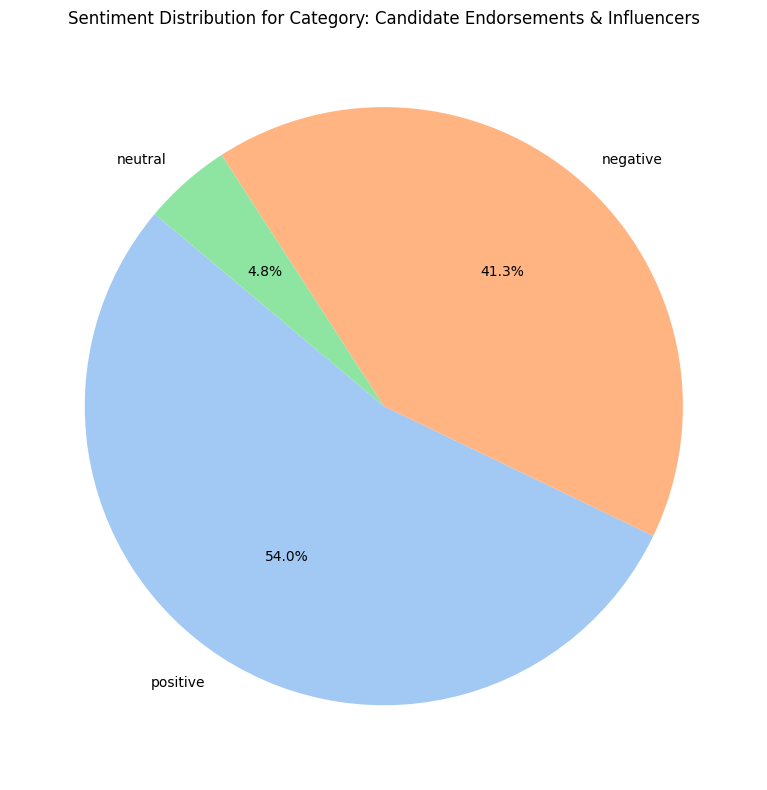

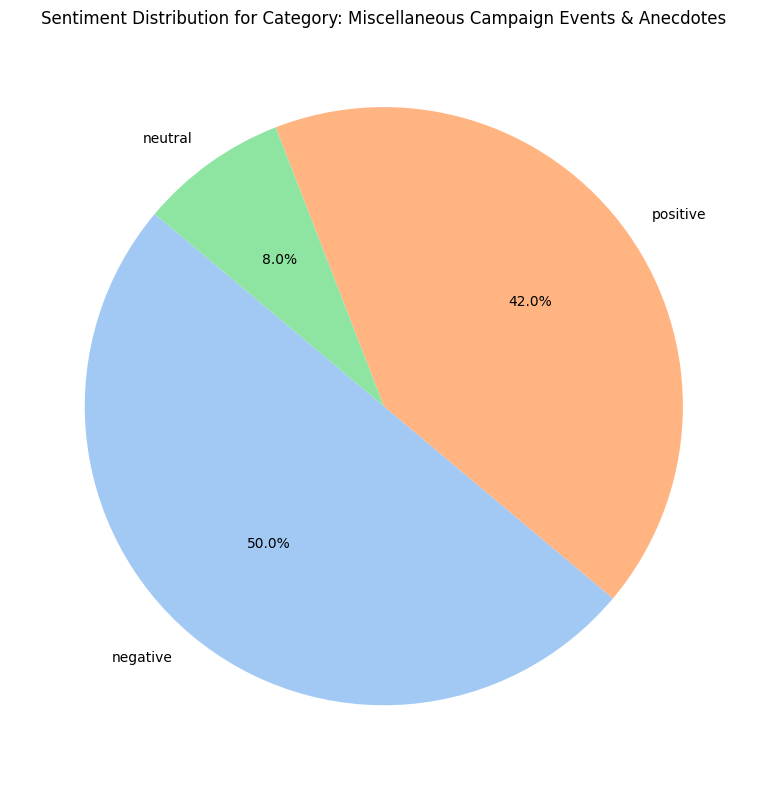

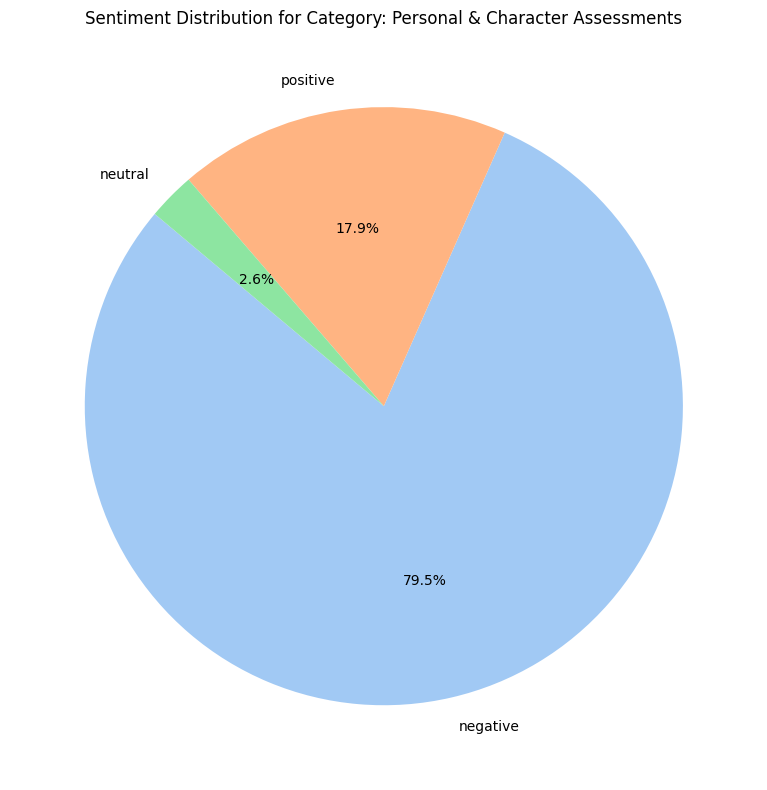

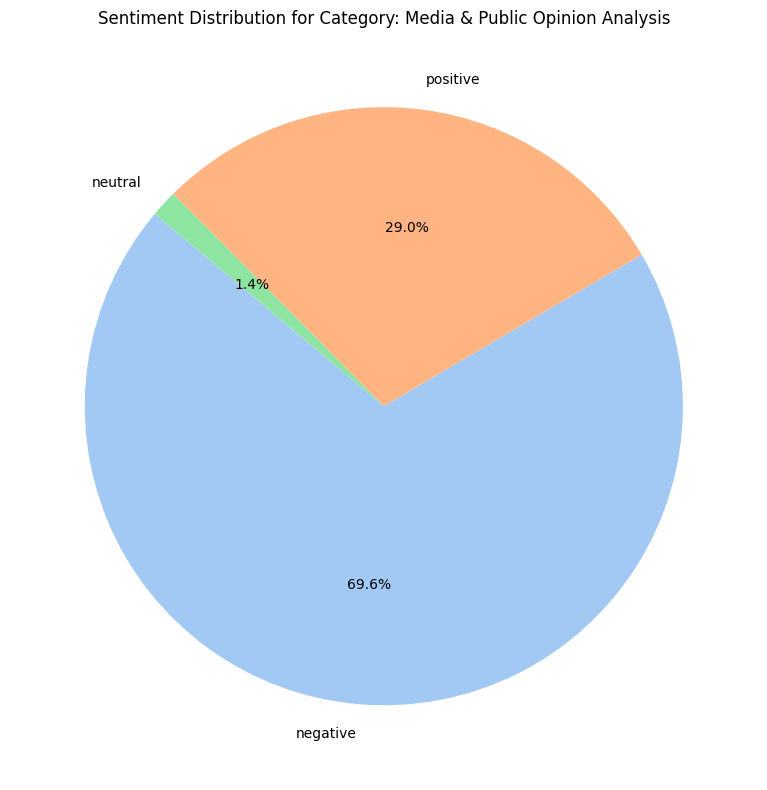

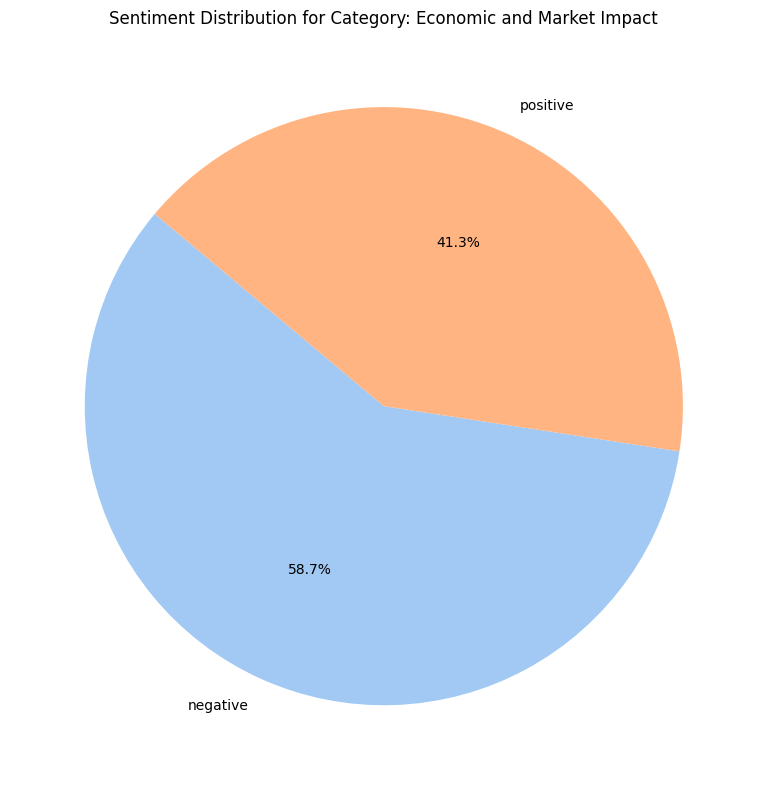

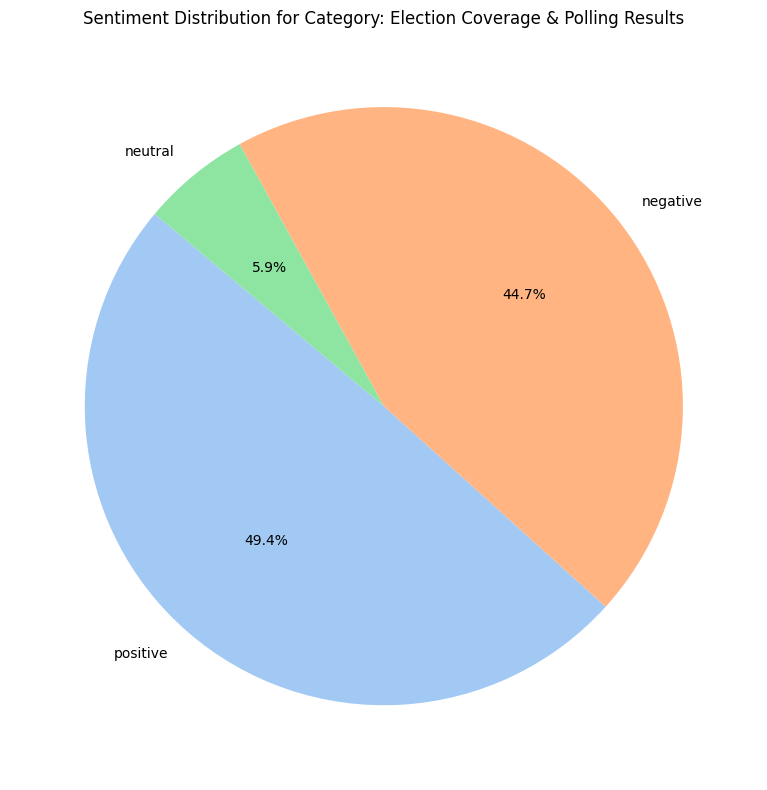

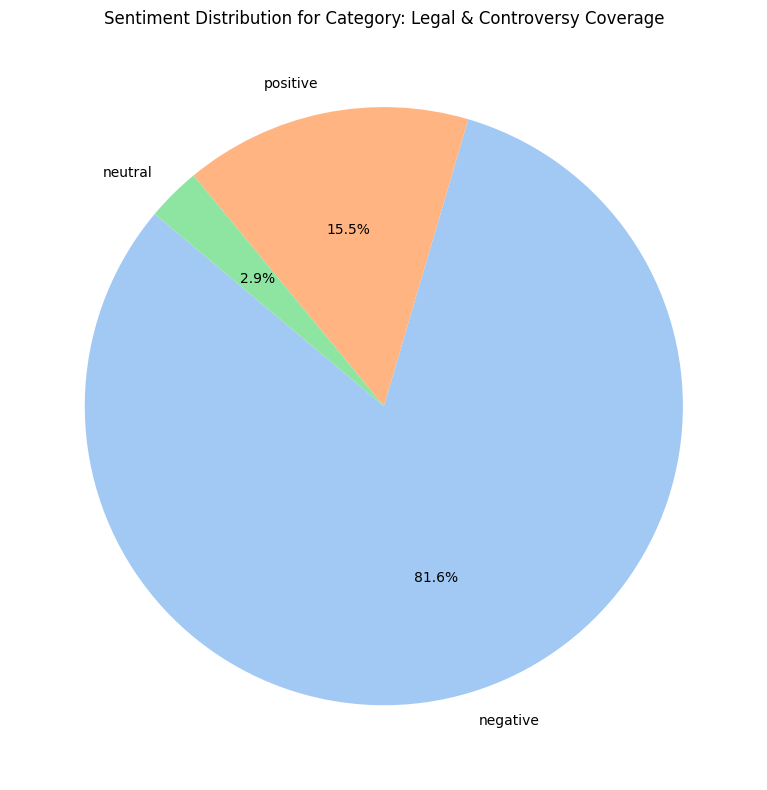

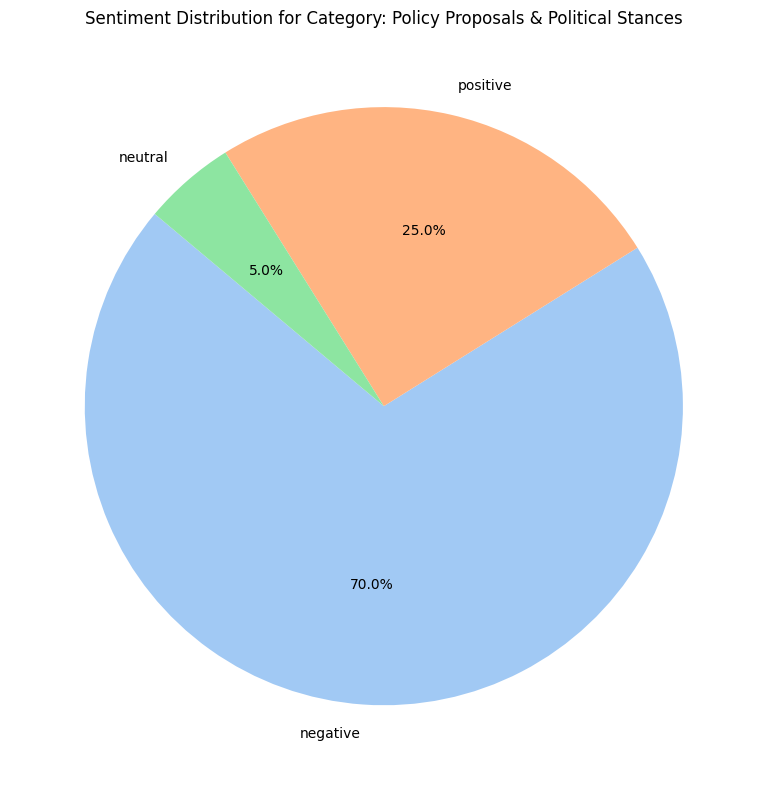

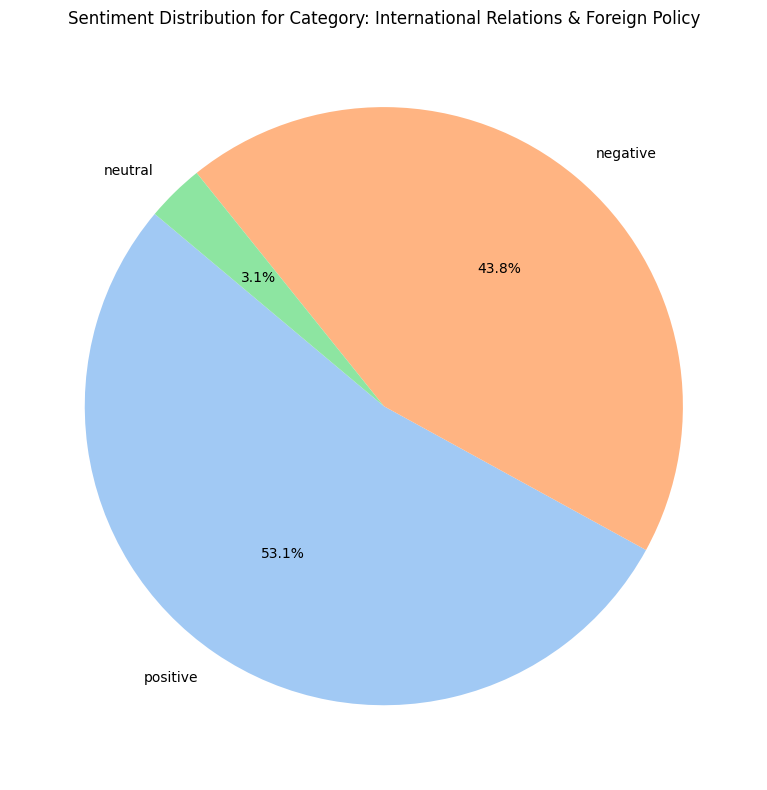

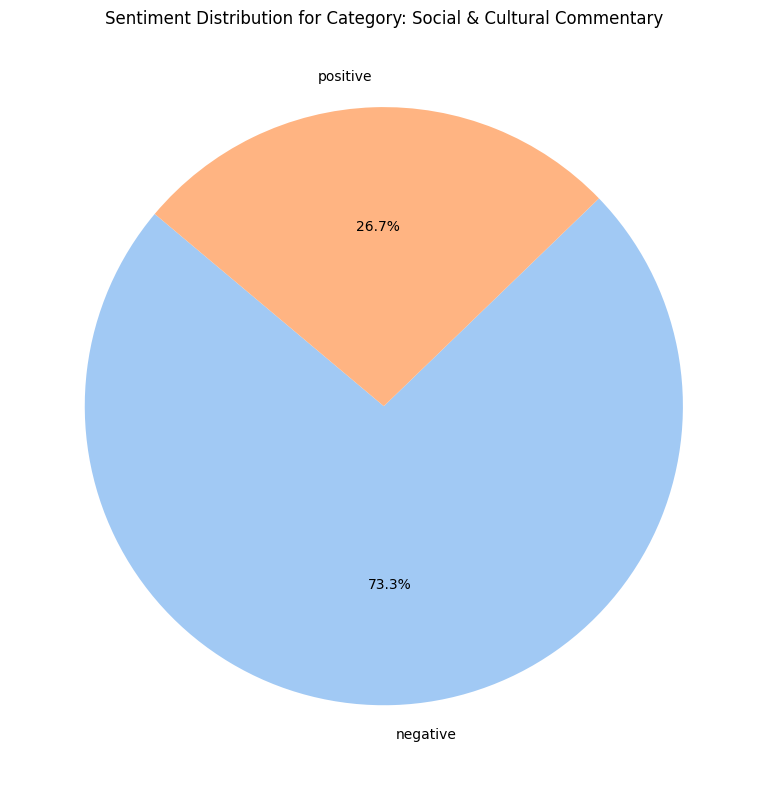

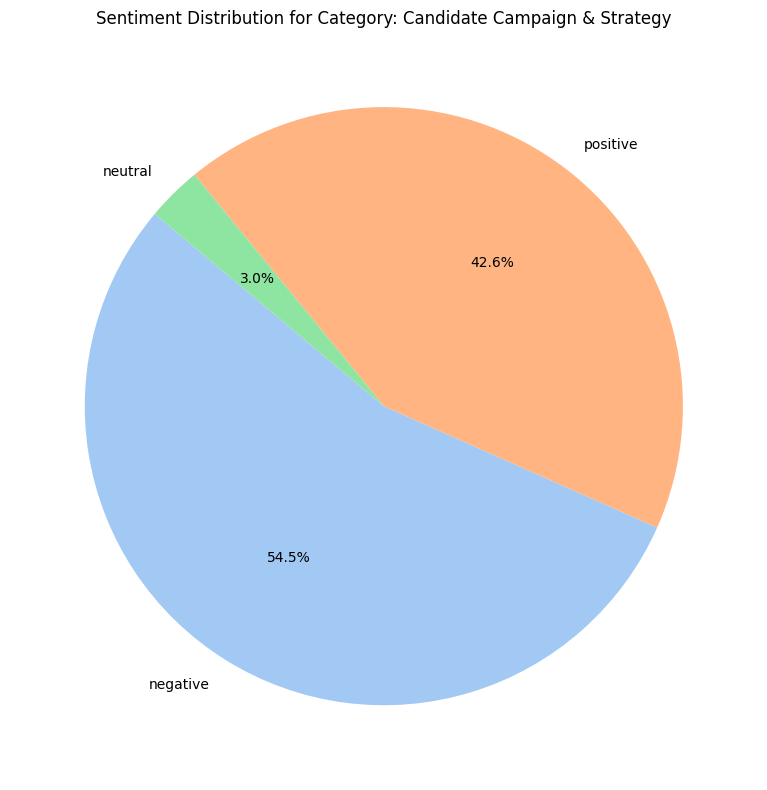

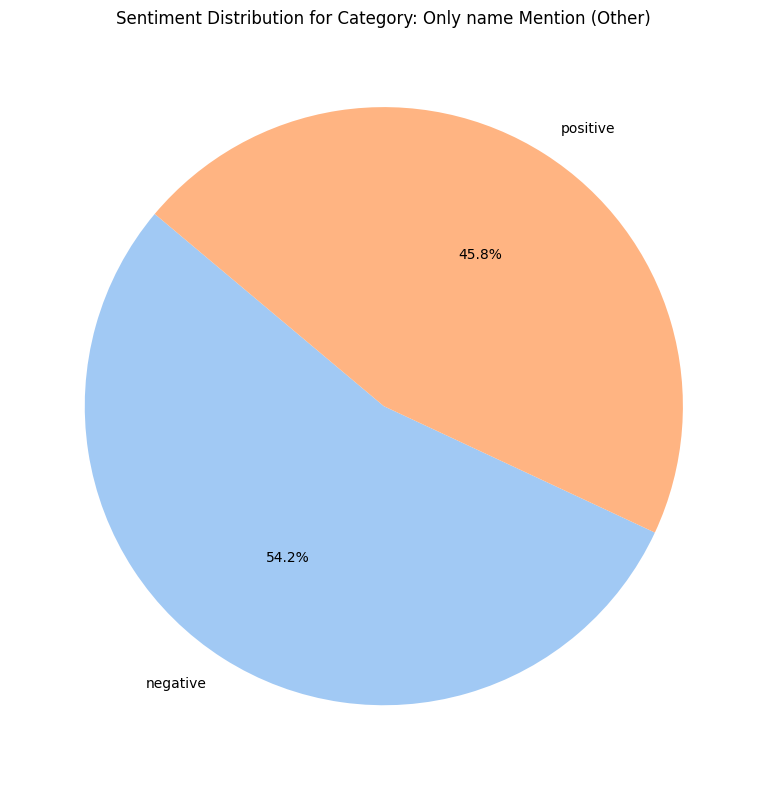

In [48]:
categories = sentiment_file['Coding'].unique()
categories = [category for category in categories if category != "Candidate "]
for category in categories:
    sentiment_distribution = sentiment_file[
        sentiment_file['Coding'] == category
    ]['Sentiment'].value_counts()

    plt.figure(figsize=(8, 8))
    sentiment_distribution.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
    plt.title(f"Sentiment Distribution for Category: {category}")
    plt.ylabel("")  
    plt.tight_layout()
    plt.savefig(f"../visuals/sentiment_distribution_{category}.png")
    plt.show()